<a href="https://colab.research.google.com/github/chohu-boraaaa/ADsP/blob/main/3_3_%EA%B2%B0%EC%B8%A1%EA%B0%92_%EC%B2%98%EB%A6%AC%EC%99%80_%EC%9D%B4%EC%83%81%EA%B0%92_%EA%B2%80%EC%83%89_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결측값 처리와 이상값 검색

## 결측 데이터
* 결측값 : 누락된 데이터 및 비어있는 데이터
* 분류 : 완전 무작위 결측, 무작위 결측, 비 무작위 결측


### 완전 무작위 결측(MCAR; Missing Completely at Random)
* 변수 상에 발생한 결측값이 다른 변수들과 전혀 관계가 없는 경우
* 결측값은 대부분 완전 무작위 결측으로 가정하고 결측값 처리
* 일반적인 경우 사람들의 실수에 의해 발생하는 입력 누락 or 프로그램 오류에 의해 발생

### 무작위 결측(MAR; Missing at Random)
* 누락된 데이터가 특정 변수와 관련이 있지만 그 변수의 결과는 관계가 없는 경우
* 누락이 있는 변수로 설명 가능

### 비 무작위 결측(MNAR; Missing Not at Random)
* 누락된 변수 결과가 다른 변수와 관련이 있는 경우

## 결측값 처리방법

### 명시적 모형에 의한 대체
* 각 변수들이 특정 확률분포를 따른다고 가정한 후에 분포의 모수들을 추정하여 대체
* 평균 대체, 중앙값 대체, 확률 대체, 비율 대체, 회귀 대체, 확률적 회귀 대체, 분포를 가정한 대체 방법

### 내재적 모형에 의한 대체
* 각 변수들이 특정 확률분포를 따른다고 가정하지 않고 가능한 정확한 값을 가지고 대체
* 핫덱 대체, 콜드덱 대체, 대입 기법

#### 핫덱 대체
- 데이터 내의 응답 값을 사용해서 결측값 대체
- 표본 조사의 결측값 대체하기 위해서 사용

#### 콜드덱 대체
* 결측 값을 외부출처(유사한 다른 조사)에서 가져온 값으로 대체
* 동일한 조사 자료가 아닌 다른 조사의 값으로 대체

### 혼합된 대체
* 명시적 모형 대체와 내재적 모형 대체를 혼합
* 처리 방법 (결측값 비율 기준)
> 10% 미만 -> 어떤 방법으로든 결측값을 제거, 10% 이상 20% 미만 -> 핫덱, Regression, Model based method, 20% 이상 -> Regression, Model based method







## R을 사용한 결측값 확인

In [8]:
# R Data frame 생성
data <- data.frame(sex=c("M", "F", NA, "M", "F"), score=c(4, 5, 3, 2, NA))
data

sex,score
<chr>,<dbl>
M,4
F,5
NA,3
M,2
F,NA


In [2]:
# Check Missing Value
is.na(data)
table(is.na(data))

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE



FALSE  TRUE 
    8     2 

### 결측값 제거

#### 단일변수 결측값 제거
* R에서 결측값 제거를 위해 "dplyr" 패키지를 설치하고 library() 함수로 패키지를 로드해야 함

In [7]:
install.packages("dplyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
# filter() 함수를 사용해서 결측값 데이터를 조회하고 결측값 데이터를 제거
data %>% filter(is.na(score))

sex,score
<chr>,<dbl>
F,NA


In [10]:
data %>% filter(!is.na(score))

sex,score
<chr>,<dbl>
M,4
F,5
NA,3
M,2


In [11]:
# 결측치 제거 후 평균 산출
data_nomiss <- data %>% filter(!is.na(score))
mean(data_nomiss$score)

[1] 3.5

#### N개 변수 결측값 제거
* 결측값이 여러 개의 변수에 있는 경우 is.na() 함수를 AND(&) 조합을 사용해서 결측값 제거 가능
* na.omit() 함수는 모든 결측값을 한번에 제거 가능

In [12]:
# N개의 변수의 결측치 제거
data_nomiss <- data %>% filter(!is.na(score)& !is.na(sex))
data_nomiss

sex,score
<chr>,<dbl>
M,4
F,5
M,2


In [13]:
# 결측치를 모두 한번에 제거
data_nomiss <- na.omit(data)
data_nomiss

,sex,score
,<chr>,<dbl>
1,M,4
2,F,5
4,M,2


#### 평균값으로 결측값을 대체
* mean() 함수를 사용할 때 "na.rm=T" 옵션을 주면 결측값을 제외하고 평균 계산함

In [15]:
# na.rm=T 옵션은 결측치를 제거하고 평균을 계산
x = mean(data$score, na.rm=T)
x

[1] 3.5

In [18]:
# 만약 score 값이 NA이면 x(평균)으로 대체
x = mean(data$score, na.rm=T)
data$score <- ifelse(is.na(data$score), x, data$score)
data

sex,score
<chr>,<dbl>
M,4.0
F,5.0
NA,3.0
M,2.0
F,3.5


## 데이터 이상값

* 관측된 데이터의 범위에서 벗어나는 아주 큰 값 혹은 아주 작은 값 의미
* 이상값은 데이터를 분석하는데 영향을 미치므로 제거해야 함

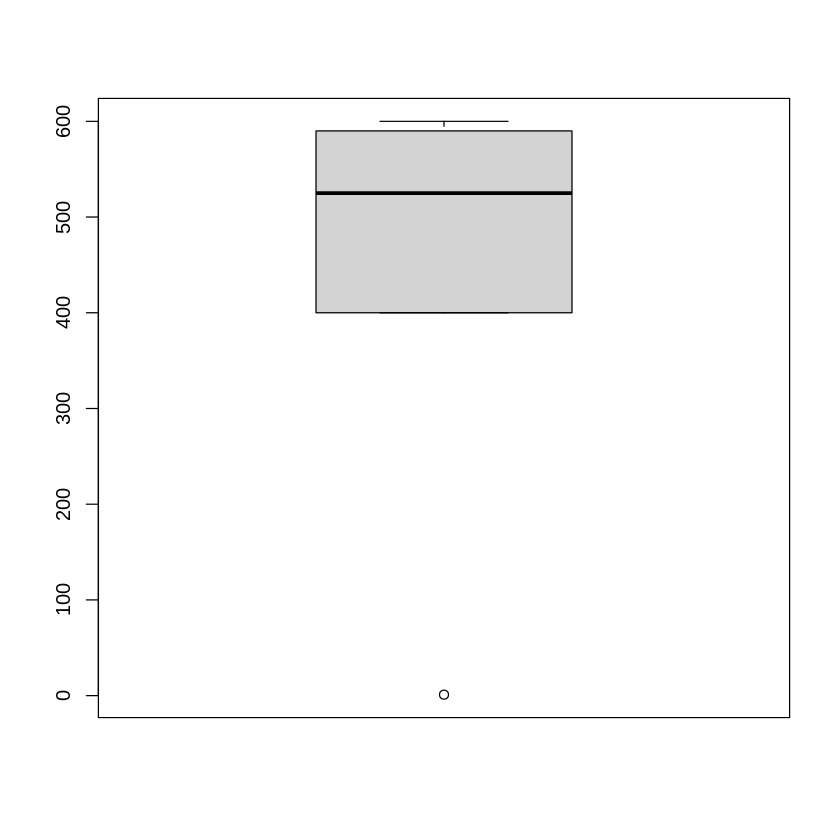

In [19]:
# 극단적인 값 확인
test = c(1, 500, 550, 400, 590, 600)
boxplot(test)

In [20]:
# 특정 범위의 값으로 test 생성
test <- ifelse(test>=500 & test<=600, test, NA)
test

[1]  NA 500 550  NA 590 600

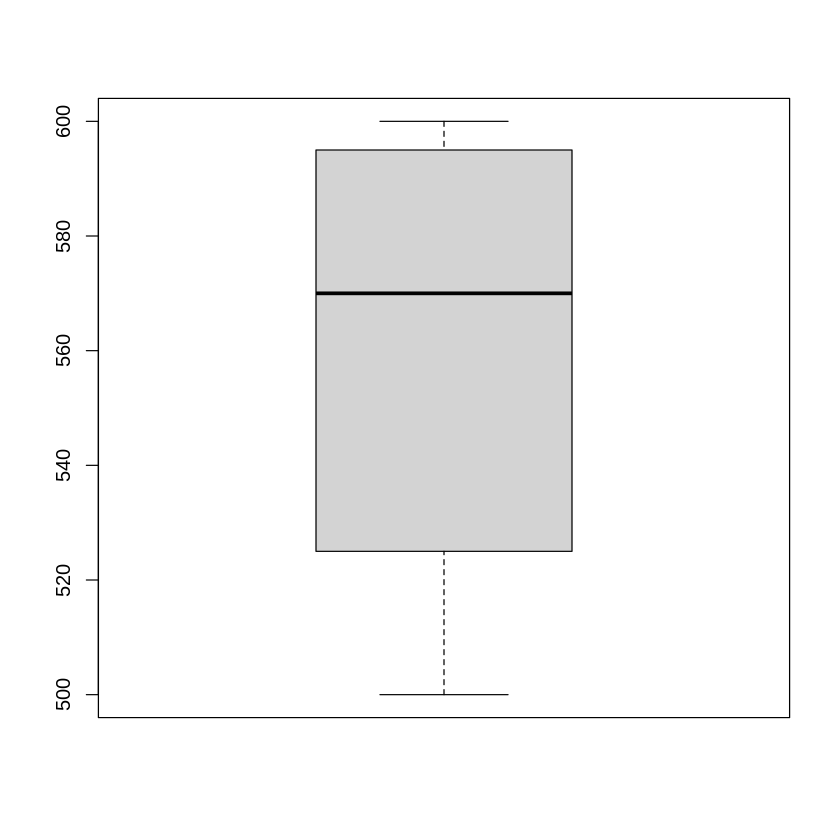

In [21]:
# 결측치 제거하고 boxplot 그리기
boxplot(test, na.rm=T)

###### 사분위수
* 0사분위수(Q0) : 최소값
* 1사분위수(Q1) : 최소값 ~ 25%번째 값
* 2사분위수(Q2) : 중앙값
* 3사분위수(Q3) : 중앙값 ~ 75%번째 값
* 4사분위수(Q4) : 최대값